Цей модуль створений для аналізу датасету з тренувальною вибіркою на предмет збалансованості, що допоможе із вибором метрик та підходу до подальної обробки, або до оцінювання моделі. 

In [4]:
import pandas as pd

# Шлях до файлу
file_path = '/kaggle/input/train-analysis/train_data.csv'

# Завантаження даних
data = pd.read_csv(file_path)

# Перевірка перших кількох рядків
print(data.head())

                 id                               cleaned_comment_text  \
0  0000997932d777bf  Explanation Why the edits made under my userna...   
1  000103f0d9cfb60f  Daww He matches this background colour Im seem...   
2  000113f07ec002fd  Hey man Im really not trying to edit war Its j...   
3  0001b41b1c6bb37e  More I cant make any real suggestions on impro...   
4  0001d958c54c6e35  You sir are my hero Any chance you remember wh...   

                                           input_ids  \
0  [101, 7526, 2339, 1996, 10086, 2015, 2081, 210...   
1  [101, 4830, 2860, 2860, 2002, 3503, 2023, 4281...   
2  [101, 4931, 2158, 10047, 2428, 2025, 2667, 200...   
3  [101, 2062, 1045, 2064, 2102, 2191, 2151, 2613...   
4  [101, 2017, 2909, 2024, 2026, 5394, 2151, 3382...   

                                     attention_masks  toxic  severe_toxic  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...      0             0   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...      0     

In [5]:
# виводимо загальну інформацію про вибірку
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    159571 non-null  object
 1   cleaned_comment_text  159571 non-null  object
 2   input_ids             159571 non-null  object
 3   attention_masks       159571 non-null  object
 4   toxic                 159571 non-null  int64 
 5   severe_toxic          159571 non-null  int64 
 6   obscene               159571 non-null  int64 
 7   threat                159571 non-null  int64 
 8   insult                159571 non-null  int64 
 9   identity_hate         159571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 12.2+ MB


In [6]:
# перевіряємо наявність пропущених значень
data.isnull().sum()

id                      0
cleaned_comment_text    0
input_ids               0
attention_masks         0
toxic                   0
severe_toxic            0
obscene                 0
threat                  0
insult                  0
identity_hate           0
dtype: int64

In [7]:
# перевіряємо унікальні значення для кожного класу

# Підрахунок кількості позитивних прикладів для кожного класу
class_distribution = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
print("Кількість позитивних прикладів для кожного класу:\n", class_distribution)

# Загальна кількість прикладів
total_samples = len(data)

# Відсоткове співвідношення по кожному класу
class_percentage = (class_distribution / total_samples) * 100
print("\nВідсоткове співвідношення класів:\n", class_percentage)

# Підрахунок нетоксичних прикладів
non_toxic_count = (data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) == 0).sum()
non_toxic_percentage = (non_toxic_count / total_samples) * 100

# Виведення нетоксичних прикладів
print(f"\nКількість нетоксичних прикладів: {non_toxic_count}")
print(f"Відсоток нетоксичних прикладів: {non_toxic_percentage:.2f}%")

Кількість позитивних прикладів для кожного класу:
 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

Відсоткове співвідношення класів:
 toxic            9.584448
severe_toxic     0.999555
obscene          5.294822
threat           0.299553
insult           4.936361
identity_hate    0.880486
dtype: float64

Кількість нетоксичних прикладів: 143346
Відсоток нетоксичних прикладів: 89.83%


Кількість міток у коментарях:
 0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64


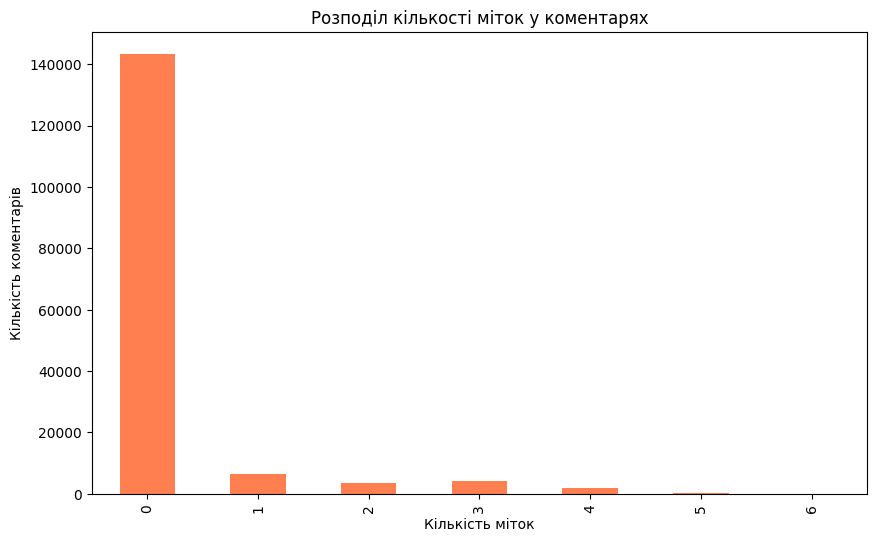

In [8]:
# Перевірка мульти-міткових прикладів

# Підрахунок кількості міток для кожного коментаря
multi_label_counts = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

# Підрахунок кількості коментарів з різною кількістю міток
multi_label_distribution = multi_label_counts.value_counts().sort_index()

# Виведення результатів
print("Кількість міток у коментарях:\n", multi_label_distribution)

# Візуалізація результатів
import matplotlib.pyplot as plt

multi_label_distribution.plot(kind='bar', color='coral', figsize=(10, 6))
plt.title('Розподіл кількості міток у коментарях')
plt.xlabel('Кількість міток')
plt.ylabel('Кількість коментарів')
plt.show()

In [9]:
# Перевірка корецяції між класами

correlation_matrix = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
print("Матриця кореляції між класами:\n", correlation_matrix)

Матриця кореляції між класами:
                   toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  


**Висновки**

Данні мають суттєвий дисбаланс:
* Найбільше прикладів належить до класу toxic (9.58%), що є найбільш поширеною токсичною категорією.
* Інші класи, такі як severe_toxic, threat, і identity_hate, мають дуже малу кількість позитивних прикладів (менше 1%).
* Майже 90% коментарів не мають жодної мітки, тобто є нетоксичними.

Аналіз мульти-міткових прикладів: 
* більшість коментарів (143,346, або близько 89.83%) не мають жодної мітки (нетоксичні)
* 1 мітка: 6,360 (4.0%) — найбільш поширений випадок серед токсичних коментарів.
* 2 мітки: 3,480 (2.2%).
* 3 мітки: 4,209 (2.6%) — більше коментарів із трьома мітками, ніж із двома.
* 4 мітки: 1,760 (1.1%).
* 5 міток: 385 (0.2%).
* 6 міток: 31 (< 0.1%) — найрідкісніший випадок.
* Деякі коментарі мають багато міток, але такі приклади рідкісні, найчастіше коментарі належать до однієї категорії токсичності.

Результати матриці кореляції показують, що деякі класи мають значний ступінь кореляції, тоді як інші є відносно незалежними: 
* Сильна кореляція: toxic ↔ obscene, toxic ↔ insult, obscene ↔ insult
* Середня кореляція: severe_toxic ↔ obscene, severe_toxic ↔ insult
* Низька кореляція: threat з іншими класами. Клас threat є майже незалежним і може вимагати більшої уваги під час навчання, оскільки він менш розповсюджений і слабо корелює з іншими токсичними класами
* identity_hate: Помірна кореляція з insult (0.34), але низька кореляція з іншими класами (< 0.29). Це свідчить, що цей клас досить унікальний.

Розподіл класів інтуітивно відповідає реальному світу (більшість коментарів не токсична, реальні погрози зустрічаються досить рідко). Якщо мета моделі фективно працювати на реальних даних, балансування класів не завжди необхідна.

Замість балансування можна використовувати методи, які не змінюють розподіл даних, але допомагають моделі краще працювати з рідкими класами. Наприклал - зваження класів в функції втрат, метрики, що врахувують дисбаланс (наприклан, weighted F1-score). 

Особливо треба контролювати метрики F1-score та Recall для рідких класів, таких як threat та identity_hate.